![Image of Yaktocat](https://cdn-images-1.medium.com/freeze/max/1000/0*5VcmiUSlG66cFvjA.png?q=20)

In [51]:
#importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [12]:
#Reading excel into fataframe named df
df = pd.read_excel('v2.xlsx')
df.head()

,id,date,time,value
0,0,2019-06-05,04:15:00,8.1
1,1,2019-06-05,04:15:00,8.1
2,2,2019-06-05,04:05:00,8.1
3,3,2019-06-05,04:05:00,7.4
4,4,2019-06-05,03:55:00,8.1


In [13]:
#CHanging date format to default date format
df['date'] = pd.to_datetime(df['date']).dt.date

In [14]:
#Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56570 entries, 0 to 56569
Data columns (total 4 columns):
id       56570 non-null int64
date     56570 non-null object
time     56570 non-null object
value    56570 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
df.describe()
#Here we can see that there are a total of 56570 rows, 
#avg temperature is 18.522
#min is 4.2
#max is 45

,id,value
count,56570.000000,56570.000000
mean,28284.500000,18.522650
std,16330.496701,5.498701
min,0.000000,4.200000
25%,14142.250000,14.800000
50%,28284.500000,17.700000
75%,42426.750000,21.900000
max,56569.000000,45.200000


In [16]:
df.set_index(df['date'],inplace=True)
df.drop('date',axis = 1,inplace=True)
df.head()

,id,time,value
date,,,
2019-06-05,0,04:15:00,8.1
2019-06-05,1,04:15:00,8.1
2019-06-05,2,04:05:00,8.1
2019-06-05,3,04:05:00,7.4
2019-06-05,4,03:55:00,8.1


In [17]:
#PLot for df with temp data of every 10 mins for 56569 rows
df.plot(grid = True,x='id',y = 'value',kind = 'line');

In [18]:
#Dropping time column
df.drop('time',axis = 1, inplace = True)
#Grouping by date and averaging value(temp)
df=df.groupby('date').agg({'value':'mean'})
df
# df.head()

,value
date,
2018-12-15,18.911417
2018-12-16,17.141472
2018-12-17,17.209707
2018-12-18,15.790568
2018-12-19,16.991989
2018-12-20,17.436475
2018-12-21,22.785091
2018-12-22,22.028764
2018-12-23,18.075806


In [19]:
df.reset_index(inplace = True,drop=False)

In [20]:
datetemp = df.copy(deep=True)

In [21]:
df.set_index(df['date'],inplace=True)

In [22]:
df.drop('date',axis=1,inplace=True)

In [23]:
#Now from 56k+ rows we've come down to 164 rows with unique dates and averaging each day's value
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 2018-12-15 to 2019-06-05
Data columns (total 1 columns):
value    164 non-null float64
dtypes: float64(1)
memory usage: 2.6+ KB


In [24]:
#The average temp is now 17, min is 7 and max is 33
#Pretty lovely weather i'd say
df.describe()

,value
count,164.000000
mean,17.612664
std,4.249396
min,7.557949
25%,15.086016
50%,17.301209
75%,20.068124
max,33.290889


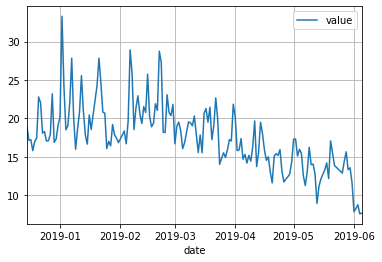

In [25]:
df.plot(grid = True);

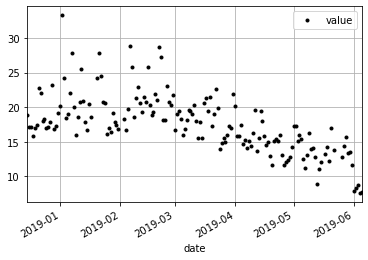

In [26]:
df.to_csv('temp1.2.csv')
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('temp1.2.csv', header=0)
series.plot(style='k.',legend = True,grid = True)
pyplot.show()

In [27]:
df.reset_index(inplace=True)

In [28]:
#Adding new features year, month and day
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
df['day'] = pd.to_datetime(df['date']).dt.day
df.drop('date',axis = 1, inplace = True)
#Changing column positions
df = df[['year','month','day','value']]

In [29]:
# Target are the values we want to predict
target = np.array(df['value'])
df.drop('value', axis = 1, inplace = True)
feature_list = list(target)
# Convert to numpy array
features = np.array(df)

In [30]:
# above we converted the data set variable into numpy array (to make it easier to work with in pandas)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, target, test_size = 0.25,random_state = 42)

#random_state as the name suggests, is used for initializing the internal random number generator
# This is to check and validate the data when running the code multiple times. 
# Setting random_state a fixed value will guarantee that 
# same sequence of random numbers are generated each time you run the code. 
# And unless there is some other randomness present in the process, 
# the results produced will be same as always. 
# This helps in verifying the output.

In [31]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (123, 3)
Training Labels Shape: (123,)
Testing Features Shape: (41, 3)
Testing Labels Shape: (41,)


In [32]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000)
# Train the model on training data
rf.fit(train_features, train_labels);

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [33]:
# we imported the model using sci-learn kit

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2.14 degrees.


In [34]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 88.1 %.


In [35]:
a = np.array([2019,1,30])
rf.predict(a.reshape(1,3))

array([17.56513857])

In [38]:
datetemp

,date,value
0,2018-12-15,18.911417
1,2018-12-16,17.141472
2,2018-12-17,17.209707
3,2018-12-18,15.790568
4,2018-12-19,16.991989
5,2018-12-20,17.436475
6,2018-12-21,22.785091
7,2018-12-22,22.028764
8,2018-12-23,18.075806
9,2018-12-24,18.286207


In [63]:
pred_date = '2019-06-04'

In [64]:
user_date = datetime.strptime(pred_date,'%Y-%m-%d').date()

In [65]:
datetemp[datetemp['date'] == user_date]

,date,value
162,2019-06-04,7.557949
